# SOK-1006 Mikro
## Seminar 4
### Oppgave 4

In [2]:
import pandas as pd
import statsmodels as sm
import statsmodels.formula.api as smf
import numpy as np
from matplotlib import pyplot as plt

/azhome/dcl000@ad.uit.no/.local/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [3]:
# laste inn data
df=pd.read_csv("https://uit-sok-1006-v22.github.io/seminarer/tesladata.csv",  sep=';')
df

,YEAR,CAPEX,Arbeidere,Produksjon
0,2012,239200000,2964,2663
1,2013,264200000,5859,22477
2,2014,969900000,10161,31655
3,2015,1635000000,13058,50658
4,2016,1440000000,17782,76285
5,2017,4081000000,37543,103181
6,2018,2319000000,48817,245506
7,2019,1432000000,48016,365232
8,2020,3232000000,70757,509737


### deloppgave a)   
Ettersom enhetene er forskjellige, la oss plotte seriene på tre forskjellige grafer.

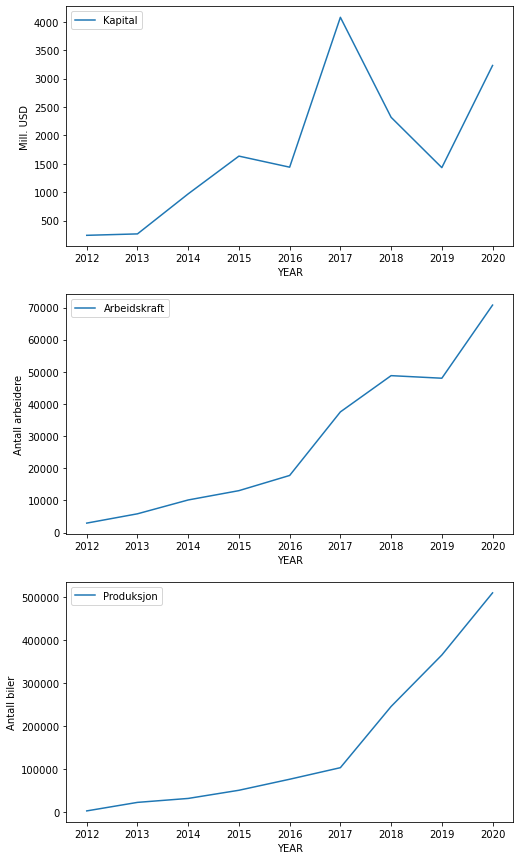

In [34]:
year=df['YEAR']
fig, (ax1,ax2,ax3)=plt.subplots(3, figsize=(8,15))

ax1.plot(year,(df['CAPEX']/1000000), label='Kapital')
ax1.set(xlabel='YEAR',ylabel='Mill. USD')
ax1.legend(loc='upper left')

ax2.plot(year, df['Arbeidere'], label='Arbeidskraft')
ax2.set(xlabel='YEAR',ylabel='Antall arbeidere')
ax2.legend(loc='upper left')

ax3.plot(year,df['Produksjon'], label='Produksjon')
ax3.set(xlabel='YEAR',ylabel='Antall biler')
ax3.legend(loc='upper left')



plt.show()


### deloppgave b)

In [3]:
#definer variabler i likning (9)
df['lxperN']=np.log(df['Produksjon']/df['Arbeidere'])
df['lN']=np.log(df['Arbeidere'])
df['lKperN']=np.log(df['CAPEX']/df['Arbeidere'])
mod = smf.ols(formula='lxperN ~  lN+lKperN', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 lxperN   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     6.869
Date:                Thu, 24 Feb 2022   Prob (F-statistic):             0.0281
Time:                        15:51:52   Log-Likelihood:                -2.7643
No. Observations:                   9   AIC:                             11.53
Df Residuals:                       6   BIC:                             12.12
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7388      4.252      0.409      0.6

/usr/local/Miniconda3-py39_4.10.3-Linux-x86_64/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Se på likning (9) i oppgave 4. Vi ser at koeffisienten på lnN er a+b-1 som i analysen ovenfor er 0.3952, dvs $a+b-1=0.3952$ som betyr at $a+b=1.3952$ og Tesla sin teknologi (om vi har spesifisert den riktig) viser stigende skalautbytte!

### deloppgave c)    
Se på likning (9). Koeffisienten foran ln(K/N) er b, men i vår estimering er dette -0.3881. Ettersom b>0 er produktfunksjonen som vi har spesifisert ikke helt riktig!